In [ ]:
#Just adding some libraries I usually use. I think sklearn has most of the UML stuff we need.

import tensorflow as tf
import sklearn
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/DS5230 Project/Data Files'

/content/gdrive/.shortcut-targets-by-id/12ES4j4sbgVWBPpUKotbi4Pgkje2ey3OT/DS5230 Project/Data Files


**Reading in the csvs**

*2015*

In [ ]:
# 2015
full_2015_county_data = pd.read_csv("full_2015_county_data.csv")
full_2015_county_data

CensusId          County        State  ... Unemployment       Lat      Long
0         1001  Autauga County      Alabama  ...          7.6  32.53490 -86.64270
1         1003  Baldwin County      Alabama  ...          7.5  30.72750 -87.72260
2         1005  Barbour County      Alabama  ...         17.6  31.86960 -85.39320
3         1007     Bibb County      Alabama  ...          8.3  32.99860 -87.12650
4         1009   Blount County      Alabama  ...          7.7  33.98090 -86.56740
...        ...             ...          ...  ...          ...       ...       ...
3215     72145       Vega Baja  Puerto Rico  ...         15.2  18.44611 -66.38750
3216     72147         Vieques  Puerto Rico  ...         12.2  18.11700 -65.41700
3217     72149        Villalba  Puerto Rico  ...         25.9  18.12722 -66.49222
3218     72151         Yabucoa  Puerto Rico  ...         24.3  18.05056 -65.87944
3219     72153           Yauco  Puerto Rico  ...         27.1  18.03694 -66.85028

[3220 rows x 42 columns]

*2017*

In [ ]:
# 2017
full_2017_county_data = pd.read_csv("full_2017_county_data.csv")
full_2017_county_data

CountyId               County  ...       Lat      Long
0         1001       Autauga County  ...  32.53490 -86.64270
1         1003       Baldwin County  ...  30.72750 -87.72260
2         1005       Barbour County  ...  31.86960 -85.39320
3         1007          Bibb County  ...  32.99860 -87.12650
4         1009        Blount County  ...  33.98090 -86.56740
...        ...                  ...  ...       ...       ...
3215     72145  Vega Baja Municipio  ...  18.44611 -66.38750
3216     72147    Vieques Municipio  ...  18.11700 -65.41700
3217     72149   Villalba Municipio  ...  18.12722 -66.49222
3218     72151    Yabucoa Municipio  ...  18.05056 -65.87944
3219     72153      Yauco Municipio  ...  18.03694 -66.85028

[3220 rows x 42 columns]

**Removing the Census ID, County name, State name, State code, Geographic region, and division as this is unsupervised**

*2015*

In [ ]:
# 2015
full_unsupervised_2015 = full_2015_county_data.iloc[:, 6:]
full_unsupervised_2015

TotalPop    Men  Women  ...  Unemployment       Lat      Long
0        55221  26745  28476  ...           7.6  32.53490 -86.64270
1       195121  95314  99807  ...           7.5  30.72750 -87.72260
2        26932  14497  12435  ...          17.6  31.86960 -85.39320
3        22604  12073  10531  ...           8.3  32.99860 -87.12650
4        57710  28512  29198  ...           7.7  33.98090 -86.56740
...        ...    ...    ...  ...           ...       ...       ...
3215     56858  27379  29479  ...          15.2  18.44611 -66.38750
3216      9130   4585   4545  ...          12.2  18.11700 -65.41700
3217     24685  12086  12599  ...          25.9  18.12722 -66.49222
3218     36279  17648  18631  ...          24.3  18.05056 -65.87944
3219     39474  19047  20427  ...          27.1  18.03694 -66.85028

[3220 rows x 36 columns]

*2017*

In [ ]:
# 2017
full_unsupervised_2017 = full_2017_county_data.iloc[:, 6:]
full_unsupervised_2017

TotalPop    Men   Women  ...  Unemployment       Lat      Long
0        55036  26899   28137  ...           5.2  32.53490 -86.64270
1       203360  99527  103833  ...           5.5  30.72750 -87.72260
2        26201  13976   12225  ...          12.4  31.86960 -85.39320
3        22580  12251   10329  ...           8.2  32.99860 -87.12650
4        57667  28490   29177  ...           4.9  33.98090 -86.56740
...        ...    ...     ...  ...           ...       ...       ...
3215     54754  26269   28485  ...          16.8  18.44611 -66.38750
3216      8931   4351    4580  ...          12.8  18.11700 -65.41700
3217     23659  11510   12149  ...          24.8  18.12722 -66.49222
3218     35025  16984   18041  ...          25.4  18.05056 -65.87944
3219     37585  18052   19533  ...          24.0  18.03694 -66.85028

[3220 rows x 36 columns]

**Normalize each feature by linearly shifting and scaling the values to the interval [0,1]**

*2015*

In [ ]:
# 2015
full_normalized_2015_dataset = (full_unsupervised_2015-full_unsupervised_2015.min())/(full_unsupervised_2015.max()-full_unsupervised_2015.min())
full_normalized_2015_dataset

TotalPop       Men     Women  ...  Unemployment       Lat      Long
0     0.005493  0.005400  0.005583  ...      0.208219  0.283741  0.335519
1     0.019429  0.019265  0.019588  ...      0.205479  0.248541  0.330837
2     0.002674  0.002923  0.002433  ...      0.482192  0.270784  0.340936
3     0.002243  0.002433  0.002059  ...      0.227397  0.292772  0.333421
4     0.005741  0.005757  0.005725  ...      0.210959  0.311903  0.335845
...        ...       ...       ...  ...           ...       ...       ...
3215  0.005656  0.005528  0.005780  ...      0.416438  0.009354  0.423340
3216  0.000901  0.000919  0.000884  ...      0.334247  0.002944  0.427548
3217  0.002451  0.002435  0.002465  ...      0.709589  0.003143  0.422886
3218  0.003606  0.003560  0.003650  ...      0.665753  0.001650  0.425543
3219  0.003924  0.003843  0.004002  ...      0.742466  0.001385  0.421334

[3220 rows x 36 columns]

In [ ]:
# Checking Max Values
full_normalized_2015_dataset.max()

TotalPop           1.0
Men                1.0
Women              1.0
Hispanic           1.0
White              1.0
Black              1.0
Native             1.0
Asian              1.0
Pacific            1.0
Citizen            1.0
Income             1.0
IncomeErr          1.0
IncomePerCap       1.0
IncomePerCapErr    1.0
Poverty            1.0
ChildPoverty       1.0
Professional       1.0
Service            1.0
Office             1.0
Construction       1.0
Production         1.0
Drive              1.0
Carpool            1.0
Transit            1.0
Walk               1.0
OtherTransp        1.0
WorkAtHome         1.0
MeanCommute        1.0
Employed           1.0
PrivateWork        1.0
PublicWork         1.0
SelfEmployed       1.0
FamilyWork         1.0
Unemployment       1.0
Lat                1.0
Long               1.0
dtype: float64

In [ ]:
# Checking Min Values
full_normalized_2015_dataset.min()

TotalPop           0.0
Men                0.0
Women              0.0
Hispanic           0.0
White              0.0
Black              0.0
Native             0.0
Asian              0.0
Pacific            0.0
Citizen            0.0
Income             0.0
IncomeErr          0.0
IncomePerCap       0.0
IncomePerCapErr    0.0
Poverty            0.0
ChildPoverty       0.0
Professional       0.0
Service            0.0
Office             0.0
Construction       0.0
Production         0.0
Drive              0.0
Carpool            0.0
Transit            0.0
Walk               0.0
OtherTransp        0.0
WorkAtHome         0.0
MeanCommute        0.0
Employed           0.0
PrivateWork        0.0
PublicWork         0.0
SelfEmployed       0.0
FamilyWork         0.0
Unemployment       0.0
Lat                0.0
Long               0.0
dtype: float64

*2017*

In [ ]:
# 2017
full_normalized_2017_dataset = (full_unsupervised_2017-full_unsupervised_2017.min())/(full_unsupervised_2017.max()-full_unsupervised_2017.min())
full_normalized_2017_dataset

TotalPop       Men     Women  ...  Unemployment       Lat      Long
0     0.005439  0.005394  0.005482  ...      0.127139  0.283741  0.335519
1     0.020116  0.019979  0.020249  ...      0.134474  0.248541  0.330837
2     0.002585  0.002799  0.002378  ...      0.303178  0.270784  0.340936
3     0.002227  0.002452  0.002008  ...      0.200489  0.292772  0.333421
4     0.005699  0.005714  0.005685  ...      0.119804  0.311903  0.335845
...        ...       ...       ...  ...           ...       ...       ...
3215  0.005411  0.005267  0.005550  ...      0.410758  0.009354  0.423340
3216  0.000876  0.000866  0.000887  ...      0.312958  0.002944  0.427548
3217  0.002334  0.002304  0.002363  ...      0.606357  0.003143  0.422886
3218  0.003459  0.003403  0.003513  ...      0.621027  0.001650  0.425543
3219  0.003712  0.003617  0.003804  ...      0.586797  0.001385  0.421334

[3220 rows x 36 columns]

In [ ]:
# Checking Max Values 2017
full_normalized_2017_dataset.max()

TotalPop            1.0
Men                 1.0
Women               1.0
Hispanic            1.0
White               1.0
Black               1.0
Native              1.0
Asian               1.0
Pacific             1.0
VotingAgeCitizen    1.0
Income              1.0
IncomeErr           1.0
IncomePerCap        1.0
IncomePerCapErr     1.0
Poverty             1.0
ChildPoverty        1.0
Professional        1.0
Service             1.0
Office              1.0
Construction        1.0
Production          1.0
Drive               1.0
Carpool             1.0
Transit             1.0
Walk                1.0
OtherTransp         1.0
WorkAtHome          1.0
MeanCommute         1.0
Employed            1.0
PrivateWork         1.0
PublicWork          1.0
SelfEmployed        1.0
FamilyWork          1.0
Unemployment        1.0
Lat                 1.0
Long                1.0
dtype: float64

In [ ]:
# Checking Min Values 2017
full_normalized_2017_dataset.min()

TotalPop            0.0
Men                 0.0
Women               0.0
Hispanic            0.0
White               0.0
Black               0.0
Native              0.0
Asian               0.0
Pacific             0.0
VotingAgeCitizen    0.0
Income              0.0
IncomeErr           0.0
IncomePerCap        0.0
IncomePerCapErr     0.0
Poverty             0.0
ChildPoverty        0.0
Professional        0.0
Service             0.0
Office              0.0
Construction        0.0
Production          0.0
Drive               0.0
Carpool             0.0
Transit             0.0
Walk                0.0
OtherTransp         0.0
WorkAtHome          0.0
MeanCommute         0.0
Employed            0.0
PrivateWork         0.0
PublicWork          0.0
SelfEmployed        0.0
FamilyWork          0.0
Unemployment        0.0
Lat                 0.0
Long                0.0
dtype: float64

**Gettting for each row, County Name, State, Geographic Region, and Division**

*2015*

In [ ]:
# Gettting for each row, County Name, State, Geographic Region, and Division 2015
full_county_identifier_2015 = full_2015_county_data.iloc[:, :6]
full_county_identifier_2015 

CensusId          County  ... Region            Division
0         1001  Autauga County  ...  South  East South Central
1         1003  Baldwin County  ...  South  East South Central
2         1005  Barbour County  ...  South  East South Central
3         1007     Bibb County  ...  South  East South Central
4         1009   Blount County  ...  South  East South Central
...        ...             ...  ...    ...                 ...
3215     72145       Vega Baja  ...  South      South Atlantic
3216     72147         Vieques  ...  South      South Atlantic
3217     72149        Villalba  ...  South      South Atlantic
3218     72151         Yabucoa  ...  South      South Atlantic
3219     72153           Yauco  ...  South      South Atlantic

[3220 rows x 6 columns]

*2017*

In [ ]:
# Gettting for each row, County Name, State, Geographic Region, and Division 2017
full_county_identifier_2017 = full_2017_county_data.iloc[:, :6]
full_county_identifier_2017 

CountyId               County  ... Region            Division
0         1001       Autauga County  ...  South  East South Central
1         1003       Baldwin County  ...  South  East South Central
2         1005       Barbour County  ...  South  East South Central
3         1007          Bibb County  ...  South  East South Central
4         1009        Blount County  ...  South  East South Central
...        ...                  ...  ...    ...                 ...
3215     72145  Vega Baja Municipio  ...  South      South Atlantic
3216     72147    Vieques Municipio  ...  South      South Atlantic
3217     72149   Villalba Municipio  ...  South      South Atlantic
3218     72151    Yabucoa Municipio  ...  South      South Atlantic
3219     72153      Yauco Municipio  ...  South      South Atlantic

[3220 rows x 6 columns]

**Getting Only Continental US Data (Excluding Alaska, Hawaii, and Puerto Rico)**

*Reading* in the csvs

2015

In [ ]:
# 2015
continental_2015_county_data = pd.read_csv("continental_2015_county_data.csv")
continental_2015_county_data

CensusId             County    State  ... Unemployment      Lat      Long
0         1001     Autauga County  Alabama  ...          7.6  32.5349  -86.6427
1         1003     Baldwin County  Alabama  ...          7.5  30.7275  -87.7226
2         1005     Barbour County  Alabama  ...         17.6  31.8696  -85.3932
3         1007        Bibb County  Alabama  ...          8.3  32.9986  -87.1265
4         1009      Blount County  Alabama  ...          7.7  33.9809  -86.5674
...        ...                ...      ...  ...          ...      ...       ...
3103     56037  Sweetwater County  Wyoming  ...          5.4  41.6595 -108.8796
3104     56039       Teton County  Wyoming  ...          2.6  43.9347 -110.5898
3105     56041       Uinta County  Wyoming  ...          4.4  41.2876 -110.5476
3106     56043    Washakie County  Wyoming  ...          6.8  43.9050 -107.6827
3107     56045      Weston County  Wyoming  ...          5.2  43.8404 -104.5676

[3108 rows x 42 columns]

2017

In [ ]:
# 2017
continental_2017_county_data = pd.read_csv("continental_2017_county_data.csv")
continental_2017_county_data

CountyId             County    State  ... Unemployment      Lat      Long
0         1001     Autauga County  Alabama  ...          5.2  32.5349  -86.6427
1         1003     Baldwin County  Alabama  ...          5.5  30.7275  -87.7226
2         1005     Barbour County  Alabama  ...         12.4  31.8696  -85.3932
3         1007        Bibb County  Alabama  ...          8.2  32.9986  -87.1265
4         1009      Blount County  Alabama  ...          4.9  33.9809  -86.5674
...        ...                ...      ...  ...          ...      ...       ...
3103     56037  Sweetwater County  Wyoming  ...          5.2  41.6595 -108.8796
3104     56039       Teton County  Wyoming  ...          1.3  43.9347 -110.5898
3105     56041       Uinta County  Wyoming  ...          6.4  41.2876 -110.5476
3106     56043    Washakie County  Wyoming  ...          6.1  43.9050 -107.6827
3107     56045      Weston County  Wyoming  ...          2.2  43.8404 -104.5676

[3108 rows x 42 columns]

*Removing* the Census ID, County name, State name, State code, Geographic region, and division as this is unsupervised 

2015

In [ ]:
# 2015
continental_unsupervised_2015 = continental_2015_county_data.iloc[:, 6:]
continental_unsupervised_2015

TotalPop    Men  Women  ...  Unemployment      Lat      Long
0        55221  26745  28476  ...           7.6  32.5349  -86.6427
1       195121  95314  99807  ...           7.5  30.7275  -87.7226
2        26932  14497  12435  ...          17.6  31.8696  -85.3932
3        22604  12073  10531  ...           8.3  32.9986  -87.1265
4        57710  28512  29198  ...           7.7  33.9809  -86.5674
...        ...    ...    ...  ...           ...      ...       ...
3103     44772  23359  21413  ...           5.4  41.6595 -108.8796
3104     22311  11537  10774  ...           2.6  43.9347 -110.5898
3105     20930  10636  10294  ...           4.4  41.2876 -110.5476
3106      8400   4144   4256  ...           6.8  43.9050 -107.6827
3107      7152   3695   3457  ...           5.2  43.8404 -104.5676

[3108 rows x 36 columns]

2017

In [ ]:
# 2017
continental_unsupervised_2017 = continental_2017_county_data.iloc[:, 6:]
continental_unsupervised_2017

TotalPop    Men   Women  ...  Unemployment      Lat      Long
0        55036  26899   28137  ...           5.2  32.5349  -86.6427
1       203360  99527  103833  ...           5.5  30.7275  -87.7226
2        26201  13976   12225  ...          12.4  31.8696  -85.3932
3        22580  12251   10329  ...           8.2  32.9986  -87.1265
4        57667  28490   29177  ...           4.9  33.9809  -86.5674
...        ...    ...     ...  ...           ...      ...       ...
3103     44527  22981   21546  ...           5.2  41.6595 -108.8796
3104     22923  12169   10754  ...           1.3  43.9347 -110.5898
3105     20758  10593   10165  ...           6.4  41.2876 -110.5476
3106      8253   4118    4135  ...           6.1  43.9050 -107.6827
3107      7117   3756    3361  ...           2.2  43.8404 -104.5676

[3108 rows x 36 columns]

*Normalize each feature by linearly shifting and scaling the values to the interval [0,1]*

2015

In [ ]:
# 2015
continental_normalized_2015_dataset = (continental_unsupervised_2015-continental_unsupervised_2015.min())/(continental_unsupervised_2015.max()-continental_unsupervised_2015.min())
continental_normalized_2015_dataset

TotalPop       Men     Women  ...  Unemployment       Lat      Long
0     0.005489  0.005393  0.005583  ...      0.258503  0.307070  0.663637
1     0.019426  0.019259  0.019588  ...      0.255102  0.230193  0.644534
2     0.002671  0.002917  0.002433  ...      0.598639  0.278771  0.685742
3     0.002240  0.002426  0.002059  ...      0.282313  0.326793  0.655079
4     0.005737  0.005751  0.005725  ...      0.261905  0.368575  0.664970
...        ...       ...       ...  ...           ...       ...       ...
3103  0.004448  0.004709  0.004196  ...      0.183673  0.695180  0.270259
3104  0.002211  0.002318  0.002107  ...      0.088435  0.791955  0.240005
3105  0.002073  0.002136  0.002013  ...      0.149660  0.679362  0.240751
3106  0.000825  0.000823  0.000827  ...      0.231293  0.790692  0.291433
3107  0.000701  0.000732  0.000670  ...      0.176871  0.787944  0.346540

[3108 rows x 36 columns]

In [ ]:
# Checking Max Values
continental_normalized_2015_dataset.max()

TotalPop           1.0
Men                1.0
Women              1.0
Hispanic           1.0
White              1.0
Black              1.0
Native             1.0
Asian              1.0
Pacific            1.0
Citizen            1.0
Income             1.0
IncomeErr          1.0
IncomePerCap       1.0
IncomePerCapErr    1.0
Poverty            1.0
ChildPoverty       1.0
Professional       1.0
Service            1.0
Office             1.0
Construction       1.0
Production         1.0
Drive              1.0
Carpool            1.0
Transit            1.0
Walk               1.0
OtherTransp        1.0
WorkAtHome         1.0
MeanCommute        1.0
Employed           1.0
PrivateWork        1.0
PublicWork         1.0
SelfEmployed       1.0
FamilyWork         1.0
Unemployment       1.0
Lat                1.0
Long               1.0
dtype: float64

In [ ]:
# Checking Min Values
continental_normalized_2015_dataset.min()

TotalPop           0.0
Men                0.0
Women              0.0
Hispanic           0.0
White              0.0
Black              0.0
Native             0.0
Asian              0.0
Pacific            0.0
Citizen            0.0
Income             0.0
IncomeErr          0.0
IncomePerCap       0.0
IncomePerCapErr    0.0
Poverty            0.0
ChildPoverty       0.0
Professional       0.0
Service            0.0
Office             0.0
Construction       0.0
Production         0.0
Drive              0.0
Carpool            0.0
Transit            0.0
Walk               0.0
OtherTransp        0.0
WorkAtHome         0.0
MeanCommute        0.0
Employed           0.0
PrivateWork        0.0
PublicWork         0.0
SelfEmployed       0.0
FamilyWork         0.0
Unemployment       0.0
Lat                0.0
Long               0.0
dtype: float64

2017

In [ ]:
# 2017
continental_normalized_2017_dataset = (continental_unsupervised_2017-continental_unsupervised_2017.min())/(continental_unsupervised_2017.max()-continental_unsupervised_2017.min())
continental_normalized_2017_dataset

TotalPop       Men     Women  ...  Unemployment       Lat      Long
0     0.005439  0.005394  0.005482  ...      0.181185  0.307070  0.663637
1     0.020116  0.019979  0.020249  ...      0.191638  0.230193  0.644534
2     0.002585  0.002799  0.002378  ...      0.432056  0.278771  0.685742
3     0.002227  0.002452  0.002008  ...      0.285714  0.326793  0.655079
4     0.005699  0.005714  0.005685  ...      0.170732  0.368575  0.664970
...        ...       ...       ...  ...           ...       ...       ...
3103  0.004399  0.004607  0.004196  ...      0.181185  0.695180  0.270259
3104  0.002261  0.002436  0.002091  ...      0.045296  0.791955  0.240005
3105  0.002047  0.002119  0.001976  ...      0.222997  0.679362  0.240751
3106  0.000809  0.000819  0.000800  ...      0.212544  0.790692  0.291433
3107  0.000697  0.000746  0.000649  ...      0.076655  0.787944  0.346540

[3108 rows x 36 columns]

In [ ]:
# Checking Max Values 2017
continental_normalized_2017_dataset.max()

TotalPop            1.0
Men                 1.0
Women               1.0
Hispanic            1.0
White               1.0
Black               1.0
Native              1.0
Asian               1.0
Pacific             1.0
VotingAgeCitizen    1.0
Income              1.0
IncomeErr           1.0
IncomePerCap        1.0
IncomePerCapErr     1.0
Poverty             1.0
ChildPoverty        1.0
Professional        1.0
Service             1.0
Office              1.0
Construction        1.0
Production          1.0
Drive               1.0
Carpool             1.0
Transit             1.0
Walk                1.0
OtherTransp         1.0
WorkAtHome          1.0
MeanCommute         1.0
Employed            1.0
PrivateWork         1.0
PublicWork          1.0
SelfEmployed        1.0
FamilyWork          1.0
Unemployment        1.0
Lat                 1.0
Long                1.0
dtype: float64

In [ ]:
# Checking Min Values 2017
continental_normalized_2017_dataset.min()

TotalPop            0.0
Men                 0.0
Women               0.0
Hispanic            0.0
White               0.0
Black               0.0
Native              0.0
Asian               0.0
Pacific             0.0
VotingAgeCitizen    0.0
Income              0.0
IncomeErr           0.0
IncomePerCap        0.0
IncomePerCapErr     0.0
Poverty             0.0
ChildPoverty        0.0
Professional        0.0
Service             0.0
Office              0.0
Construction        0.0
Production          0.0
Drive               0.0
Carpool             0.0
Transit             0.0
Walk                0.0
OtherTransp         0.0
WorkAtHome          0.0
MeanCommute         0.0
Employed            0.0
PrivateWork         0.0
PublicWork          0.0
SelfEmployed        0.0
FamilyWork          0.0
Unemployment        0.0
Lat                 0.0
Long                0.0
dtype: float64

*Gettting for each row, County Name, State, Geographic Region, and Division*

2015

In [ ]:
# Gettting for each row, County Name, State, Geographic Region, and Division 2015
continental_county_identifier_2015 = continental_2015_county_data.iloc[:, :6]
continental_county_identifier_2015 

CensusId             County  ... Region            Division
0         1001     Autauga County  ...  South  East South Central
1         1003     Baldwin County  ...  South  East South Central
2         1005     Barbour County  ...  South  East South Central
3         1007        Bibb County  ...  South  East South Central
4         1009      Blount County  ...  South  East South Central
...        ...                ...  ...    ...                 ...
3103     56037  Sweetwater County  ...   West            Mountain
3104     56039       Teton County  ...   West            Mountain
3105     56041       Uinta County  ...   West            Mountain
3106     56043    Washakie County  ...   West            Mountain
3107     56045      Weston County  ...   West            Mountain

[3108 rows x 6 columns]

2017

In [ ]:
# Gettting for each row, County Name, State, Geographic Region, and Division 2017
continental_county_identifier_2017 = continental_2017_county_data.iloc[:, :6]
continental_county_identifier_2017 

CountyId             County  ... Region            Division
0         1001     Autauga County  ...  South  East South Central
1         1003     Baldwin County  ...  South  East South Central
2         1005     Barbour County  ...  South  East South Central
3         1007        Bibb County  ...  South  East South Central
4         1009      Blount County  ...  South  East South Central
...        ...                ...  ...    ...                 ...
3103     56037  Sweetwater County  ...   West            Mountain
3104     56039       Teton County  ...   West            Mountain
3105     56041       Uinta County  ...   West            Mountain
3106     56043    Washakie County  ...   West            Mountain
3107     56045      Weston County  ...   West            Mountain

[3108 rows x 6 columns]

In [ ]:
full_normalized_2017_dataset

TotalPop       Men     Women  ...  Unemployment       Lat      Long
0     0.005439  0.005394  0.005482  ...      0.127139  0.283741  0.335519
1     0.020116  0.019979  0.020249  ...      0.134474  0.248541  0.330837
2     0.002585  0.002799  0.002378  ...      0.303178  0.270784  0.340936
3     0.002227  0.002452  0.002008  ...      0.200489  0.292772  0.333421
4     0.005699  0.005714  0.005685  ...      0.119804  0.311903  0.335845
...        ...       ...       ...  ...           ...       ...       ...
3215  0.005411  0.005267  0.005550  ...      0.410758  0.009354  0.423340
3216  0.000876  0.000866  0.000887  ...      0.312958  0.002944  0.427548
3217  0.002334  0.002304  0.002363  ...      0.606357  0.003143  0.422886
3218  0.003459  0.003403  0.003513  ...      0.621027  0.001650  0.425543
3219  0.003712  0.003617  0.003804  ...      0.586797  0.001385  0.421334

[3220 rows x 36 columns]

In [ ]:
# Finding location of NaN values

full_normalized_2017_dataset.isnull().sum()

TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        1
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
Lat                 0
Long                0
dtype: int64

In [ ]:
# Finding index of NaN value in Child Poverty column (has one Nan, only column with NaN)

for i in range(len(full_normalized_2017_dataset)):
  if full_normalized_2017_dataset['ChildPoverty'].isnull()[i] == True:
      print(i)



548


In [ ]:
# Dropping row with NaN value

full_normalized_2017_dataset = full_normalized_2017_dataset.drop(labels=[548], axis=0)

In [ ]:
from sklearn.decomposition import PCA


pca=PCA(n_components=len(full_normalized_2017_dataset.columns))
pca.fit(full_normalized_2017_dataset)

full_2017_pca_values = pca.singular_values_
full_2017_explained_variance = pca.explained_variance_ratio_
PC_values = np.arange(pca.n_components_) + 1

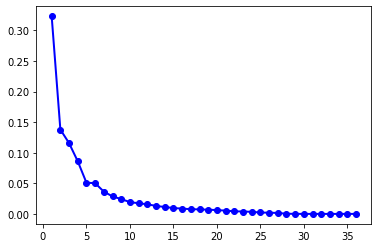

In [ ]:
plt.plot(PC_values, full_2017_explained_variance, 'o-', linewidth=2, color='blue')

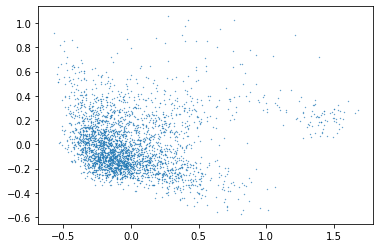

In [ ]:
pca2D = PCA(n_components=2)
full_2017_pca2D = pca2D.fit(full_normalized_2017_dataset)
full_2017_pca2D_T = pca2D.transform(full_normalized_2017_dataset)


plt.scatter(full_2017_pca2D_T[:,0], full_2017_pca2D_T[:,1], s=0.1)

In [ ]:
full_county_identifier_2017['Region'].unique()

array(['South', 'West', 'Northeast', 'Midwest'], dtype=object)

In [ ]:
full_county_identifier_2017 = full_county_identifier_2017.drop(548)

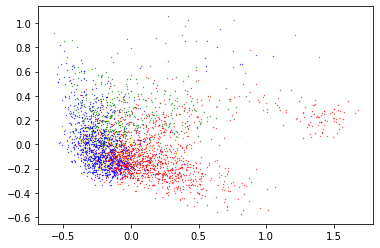

In [ ]:
c=['red', 'green', 'yellow', 'blue']

for l,i in enumerate(full_county_identifier_2017['Region'].unique()):
  for j,k in enumerate(full_county_identifier_2017['Region']):
    if k==i:
      plt.scatter(full_2017_pca2D_T[j,0], full_2017_pca2D_T[j,1], s=0.1, c=c[l])

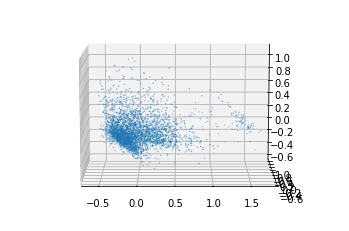

In [ ]:
pca3D = PCA(n_components=3)
full_2017_pca3D = pca3D.fit(full_normalized_2017_dataset)
full_2017_pca3D_T = pca3D.transform(full_normalized_2017_dataset)


ax = plt.axes(projection='3d')
ax.scatter(full_2017_pca3D_T[:,0],full_2017_pca3D_T[:,1], full_2017_pca3D_T[:,2], s=0.1)
ax.view_init(elev=10, azim=270)

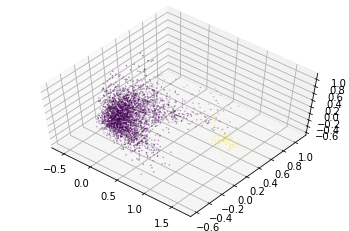

In [ ]:
labels = []
for j in full_county_identifier_2017['State Code']:
  if j=='PR':
    labels.append(1)
  else:
    labels.append(0)

ax = plt.axes(projection='3d')
ax.scatter(full_2017_pca3D_T[:,0],full_2017_pca3D_T[:,1], full_2017_pca3D_T[:,2], s=0.1, c=labels)
ax.view_init(elev=60, azim=310)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
full_2017_tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='random').fit_transform(full_normalized_2017_dataset.astype(np.float64))

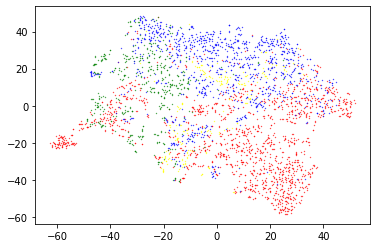

In [ ]:
for l,i in enumerate(full_county_identifier_2017['Region'].unique()):
  for j,k in enumerate(full_county_identifier_2017['Region']):
    if k==i:
      plt.scatter(full_2017_tsne[j,0], full_2017_tsne[j,1], s=0.1, c=c[l])



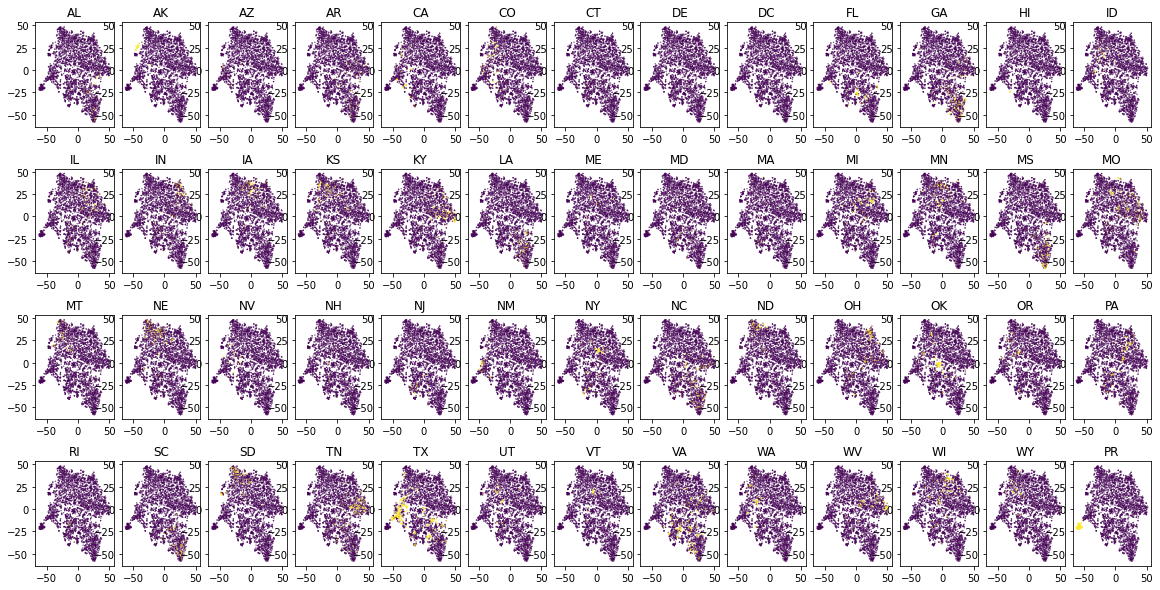

In [ ]:
fig, axs = plt.subplots(4,13, figsize=(20, 10))
fig.subplots_adjust(hspace = .4, wspace=.1)
axs = axs.ravel()

for i,k in enumerate(full_county_identifier_2017['State Code'].unique()):
  labels = []
  for j in full_county_identifier_2017['State Code']:
    if j==k:
      labels.append(1)
    else:
      labels.append(0)
  axs[i].scatter(full_2017_tsne[:,0], full_2017_tsne[:,1], s=0.1, c=labels)
  axs[i].set_title(k)

In [ ]:
full_normalized_2015_dataset.isnull().sum()

TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
Lat                0
Long               0
dtype: int64

In [ ]:
for i in range(len(full_normalized_2015_dataset)):
  if full_normalized_2015_dataset['IncomeErr'].isnull()[i] == True:
      print(i)

2673


In [ ]:
full_normalized_2015_dataset = full_normalized_2015_dataset.drop([548,2673])

In [ ]:
full_county_identifier_2015 = full_county_identifier_2015.drop([548,2673])

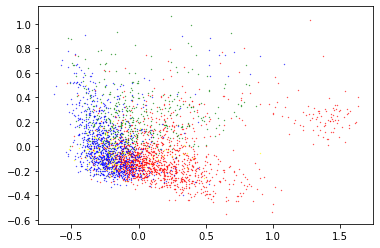

In [ ]:
pca2D = PCA(n_components=2)
full_2015_pca2D = pca2D.fit(full_normalized_2015_dataset)
full_2015_pca2D_T = pca2D.transform(full_normalized_2015_dataset)

c=['red', 'green', 'yellow', 'blue']

for l,i in enumerate(full_county_identifier_2015['Region'].unique()):
  for j,k in enumerate(full_county_identifier_2015['Region']):
    if k==i:
      plt.scatter(full_2015_pca2D_T[j,0], full_2015_pca2D_T[j,1], s=0.1, c=c[l])

In [ ]:
full_2015_tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='random').fit_transform(full_normalized_2015_dataset.astype(np.float64))

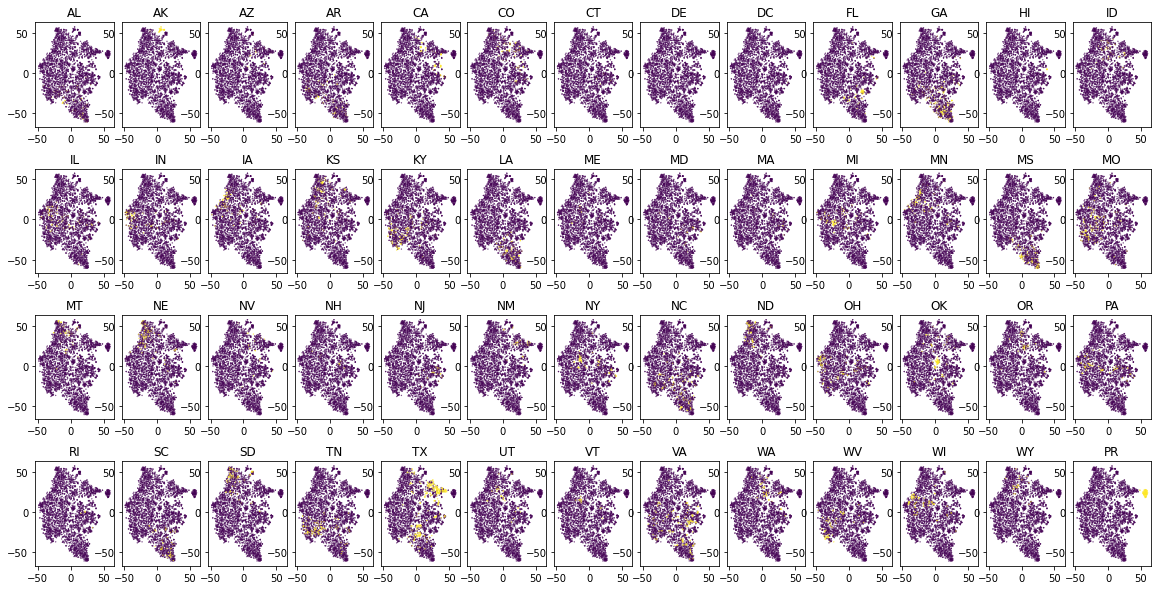

In [ ]:
fig, axs = plt.subplots(4,13, figsize=(20, 10))
fig.subplots_adjust(hspace = .4, wspace=.1)
axs = axs.ravel()

for i,k in enumerate(full_county_identifier_2015['State Code'].unique()):
  labels = []
  for j in full_county_identifier_2015['State Code']:
    if j==k:
      labels.append(1)
    else:
      labels.append(0)
  axs[i].scatter(full_2015_tsne[:,0], full_2015_tsne[:,1], s=0.1, c=labels)
  axs[i].set_title(k)

In [ ]:
small_data = full_normalized_2017_dataset.astype(np.float64).drop(columns=['Lat', 'Long'])

In [ ]:
small_2017_tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='random').fit_transform(small_data)

Text(0.5, 1.0, 'PR')

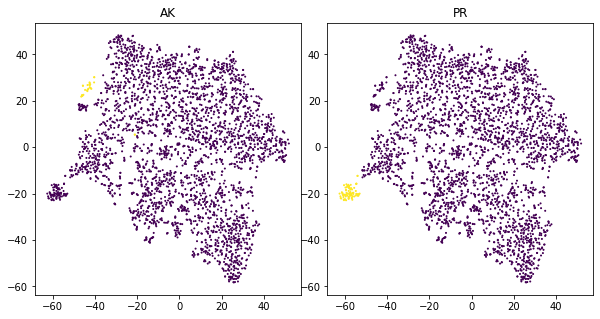

In [115]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
fig.subplots_adjust(hspace = .4, wspace=.1)

labels=[]
for j in full_county_identifier_2017['State Code']:
    if j=='AK':
      labels.append(1)
    else:
      labels.append(0)
axs[0].scatter(full_2017_tsne[:,0], full_2017_tsne[:,1], s=1, c=labels)
axs[0].set_title('AK')

labels=[]
for j in full_county_identifier_2017['State Code']:
    if j=='PR':
      labels.append(1)
    else:
      labels.append(0)
axs[1].scatter(full_2017_tsne[:,0], full_2017_tsne[:,1], s=1, c=labels)
axs[1].set_title('PR')

# labels=[]
# for j in full_county_identifier_2017['State Code']:
#     if j=='HI':
#       labels.append(1)
#     else:
#       labels.append(0)
# axs[2].scatter(small_2017_tsne[:,0], small_2017_tsne[:,1], s=1, c=labels)
# axs[2].set_title('HI')

Text(0.5, 1.0, 'Hispanic')

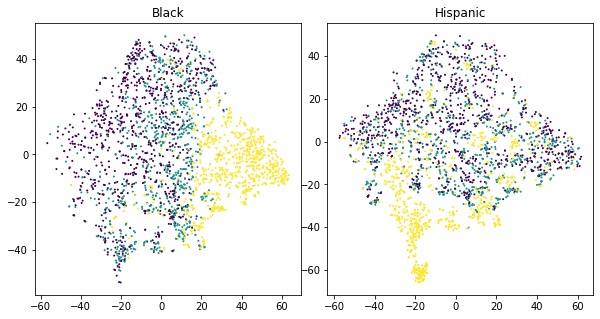

In [120]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
fig.subplots_adjust(hspace = .4, wspace=.1)

axs[0].scatter(small_2017_tsne[:,0], small_2017_tsne[:,1], s=1, c=pd.qcut(small_data['Black'], np.linspace(0.25,1,4), labels=False, duplicates='drop'))
axs[0].set_title('Black')

axs[1].scatter(small_2017_tsne[:,0], small_2017_tsne[:,1], s=1, c=pd.qcut(small_data['Hispanic'], np.linspace(0.25,1,4), labels=False, duplicates='drop'))
axs[1].set_title('Hispanic')

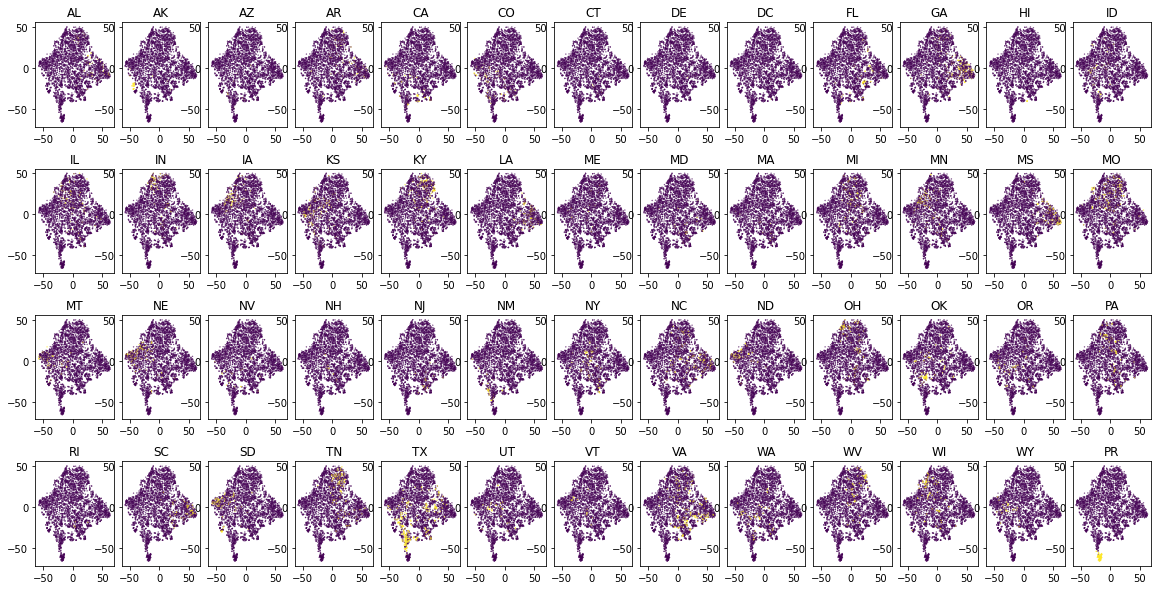

In [106]:
fig, axs = plt.subplots(4,13, figsize=(20, 10))
fig.subplots_adjust(hspace = .4, wspace=.1)
axs = axs.ravel()

for i,k in enumerate(full_county_identifier_2017['State Code'].unique()):
  labels = []
  for j in full_county_identifier_2017['State Code']:
    if j==k:
      labels.append(1)
    else:
      labels.append(0)
  axs[i].scatter(small_2017_tsne[:,0], small_2017_tsne[:,1], s=0.1, c=labels)
  axs[i].set_title(k)

In [ ]:
len(small_data.columns)

34

In [ ]:
np.quantile(small_data['TotalPop'], np.linspace(0.1,1,10))

array([5.07478590e-04, 8.93995120e-04, 1.35888367e-03, 1.88904264e-03,
       2.55114764e-03, 3.63642193e-03, 5.17360193e-03, 8.97709875e-03,
       2.00801967e-02, 1.00000000e+00])

In [ ]:
pd.qcut(small_data['TotalPop'], np.linspace(0.1,1,10), labels=[1,2,3,4,5,6,7,8,9])

0       7
1       9
2       5
3       4
4       7
       ..
3215    7
3216    1
3217    4
3218    5
3219    6
Name: TotalPop, Length: 3219, dtype: category
Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]

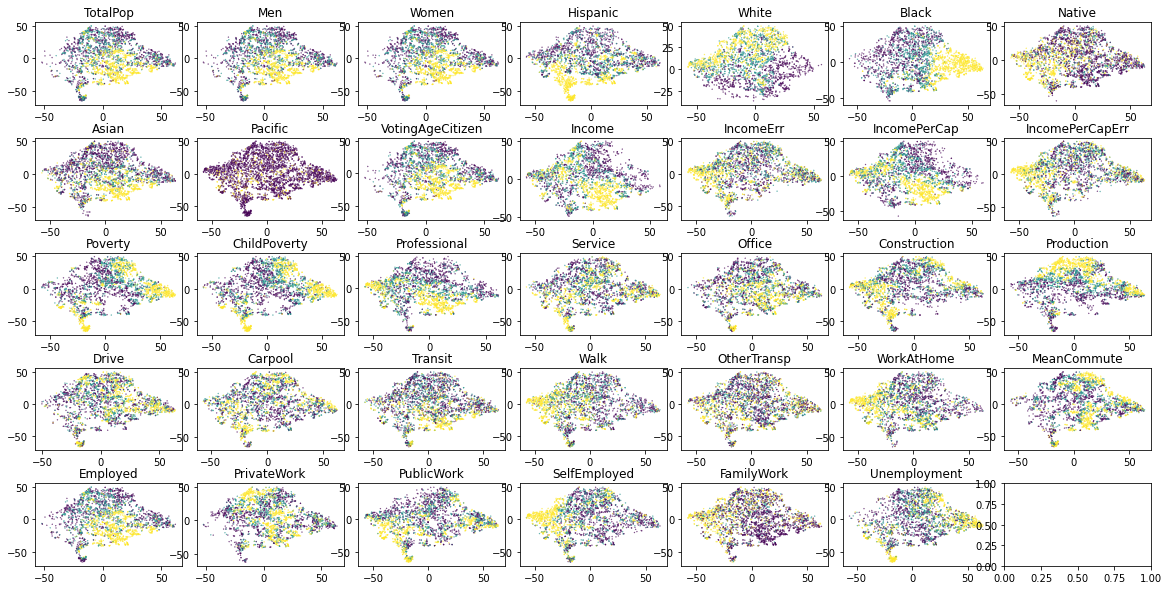

In [ ]:
fig, axs = plt.subplots(5,7, figsize=(20, 10))
fig.subplots_adjust(hspace = .4, wspace=.1)
axs = axs.ravel()

for i,col in enumerate(small_data.columns):
  bins = pd.qcut(small_data[col], np.linspace(0.25,1,4), labels=False, duplicates='drop')

  axs[i].scatter(small_2017_tsne[:,0], small_2017_tsne[:,1], s=0.1, c=bins)
  axs[i].set_title(col)



In [104]:
len(small_data.columns)

34

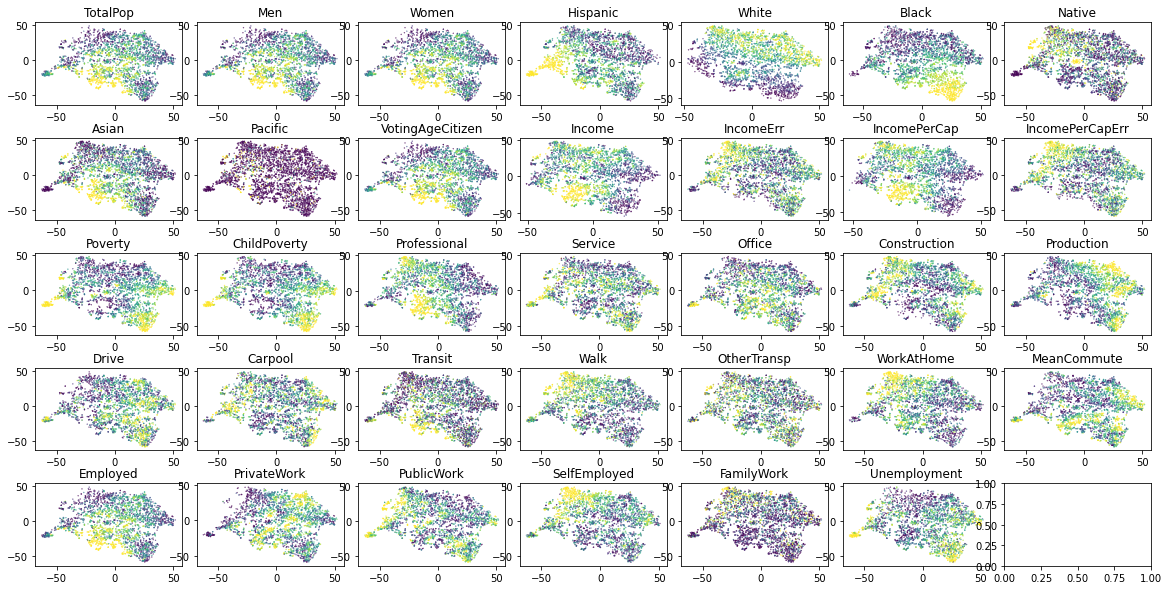

In [ ]:
fig, axs = plt.subplots(5,7, figsize=(20, 10))
fig.subplots_adjust(hspace = .4, wspace=.1)
axs = axs.ravel()

for i,col in enumerate(small_data.columns):
  bins = pd.qcut(full_normalized_2017_dataset[col], np.linspace(0.1,1,10), labels=False, duplicates='drop')

  axs[i].scatter(full_2017_tsne[:,0], full_2017_tsne[:,1], s=0.1, c=bins)
  axs[i].set_title(col)

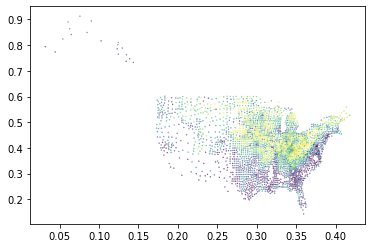

In [ ]:
plt.scatter(full_normalized_2017_dataset['Long'], full_normalized_2017_dataset['Lat'], s=0.1, c=pd.qcut(full_normalized_2017_dataset['White'], np.linspace(0.1,1,10), labels=False, duplicates='drop'))

## Ridge and Lasso Regression

In [ ]:
# Ridge and Lasso Regression
from sklearn import linear_model

In [ ]:
n_alphas = 100
alpha_vals = np.logspace(-5, 2, n_alphas)

coefs = {}
for c in range(len(full_normalized_2017_dataset.columns)):
  coefs[c] = []
  for alpha in alpha_vals:
    ridge_model = linear_model.Ridge(alpha=alpha)
    ridge_model.fit(full_normalized_2017_dataset.values, full_normalized_2017_dataset[full_normalized_2017_dataset.columns[c]].values)
    coefs[c].append(ridge_model.coef_)

  # TODO: 
  # - label top features for each plot
  # normalize weights
  # plot as fn of ||beta_alpha^R||_2 / ||beta||_2

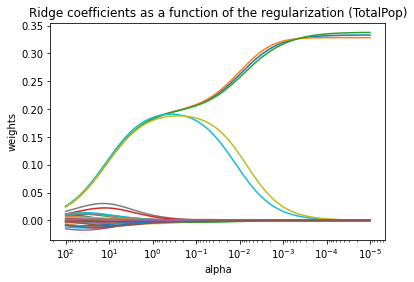

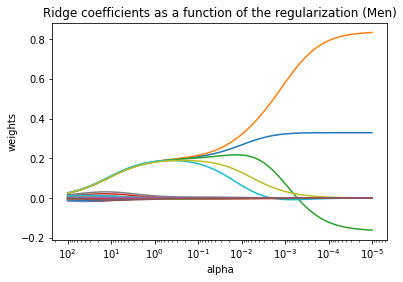

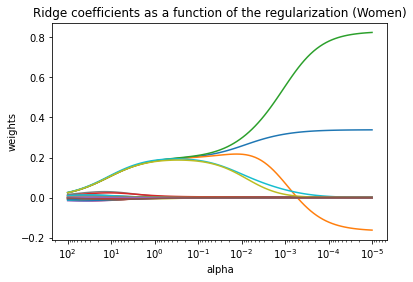

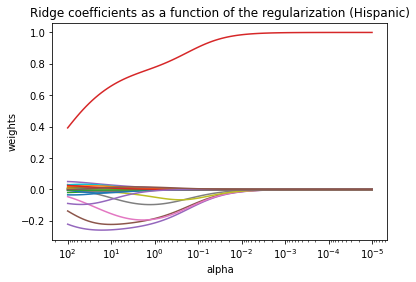

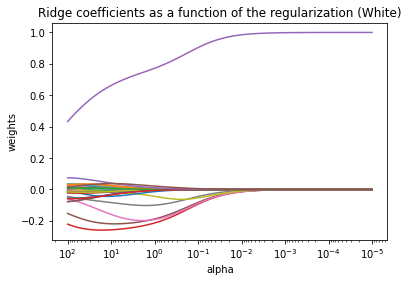

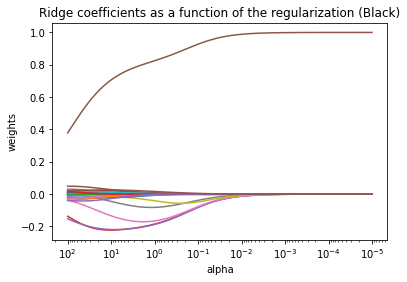

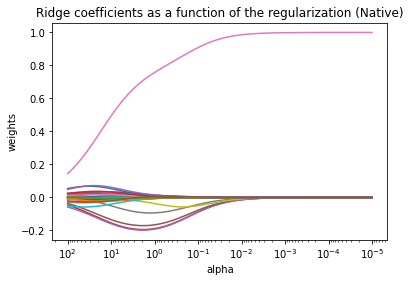

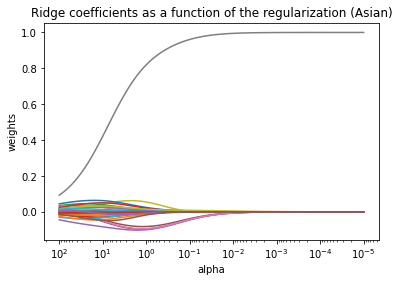

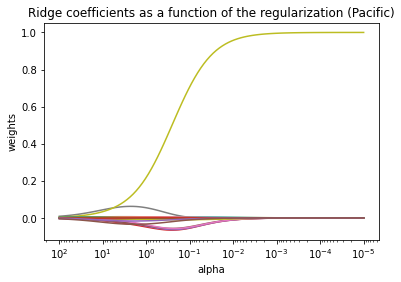

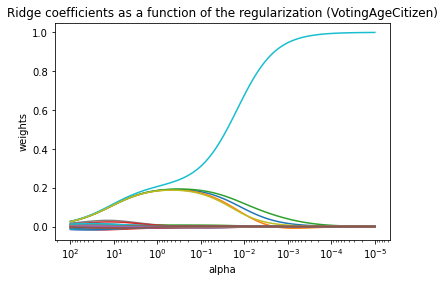

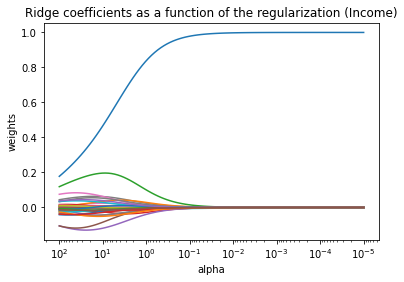

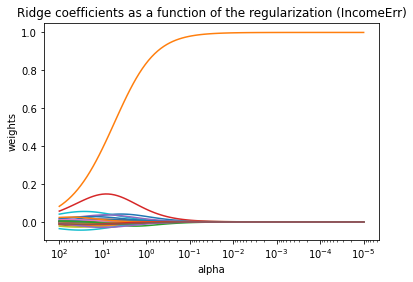

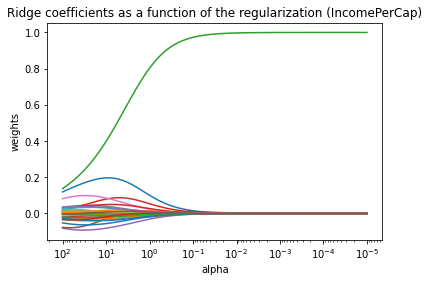

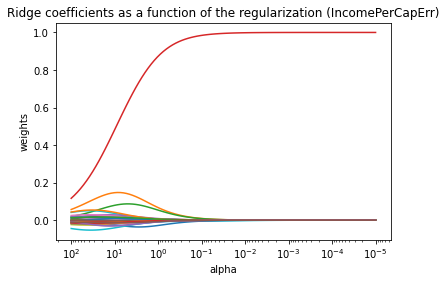

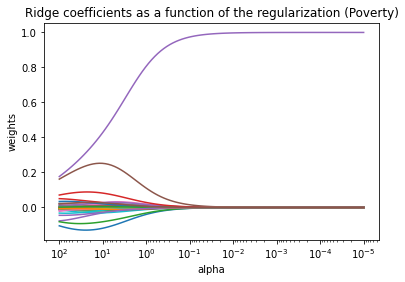

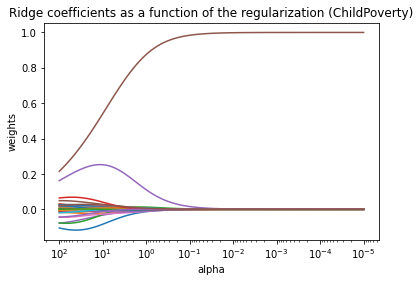

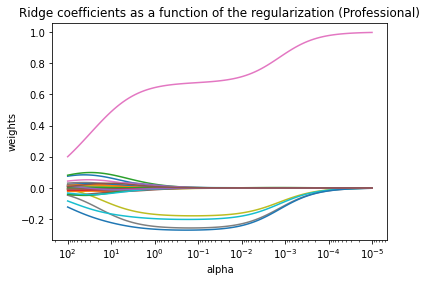

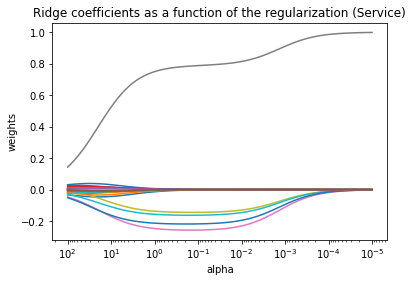

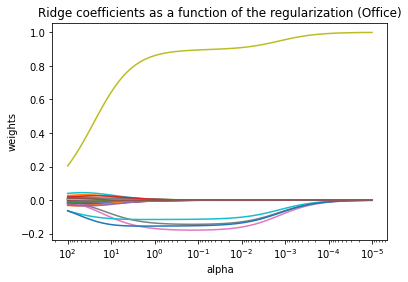

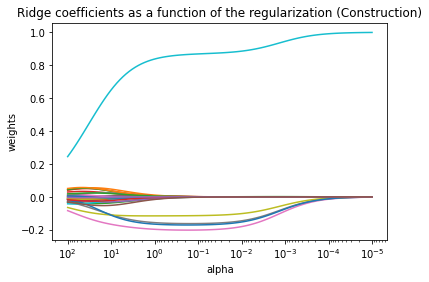

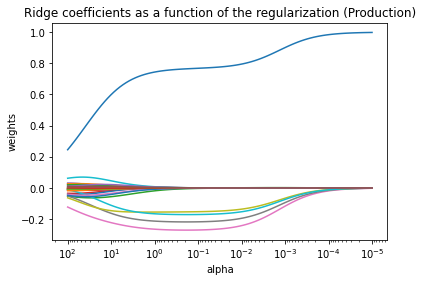

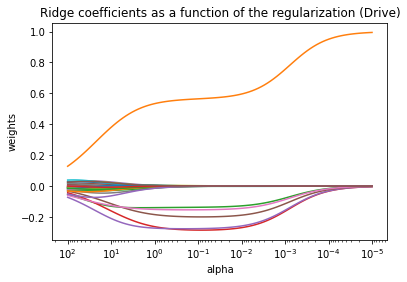

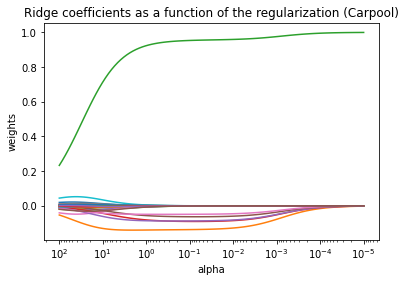

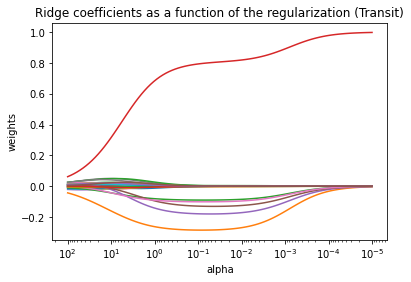

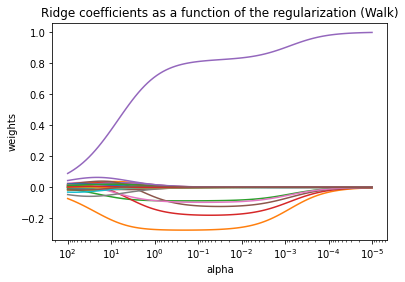

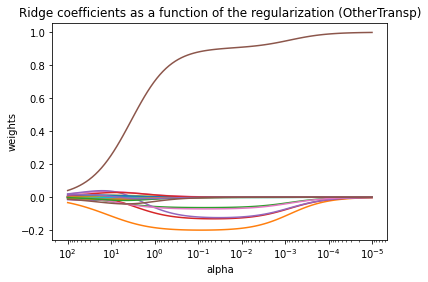

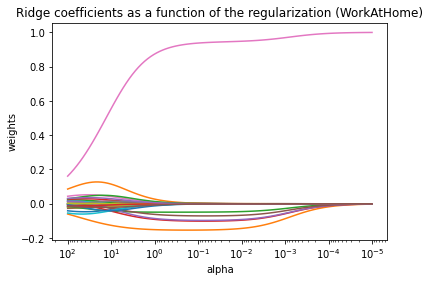

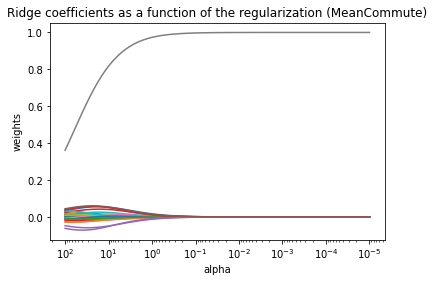

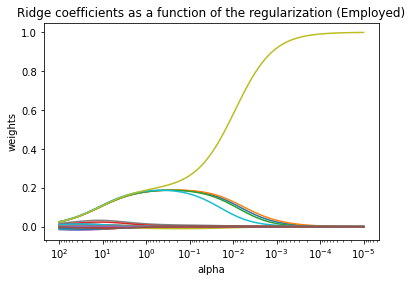

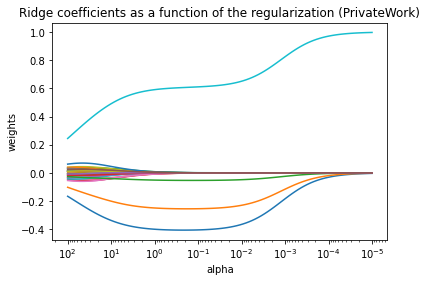

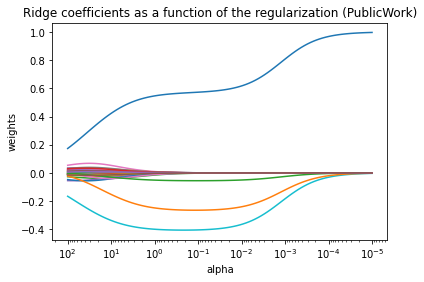

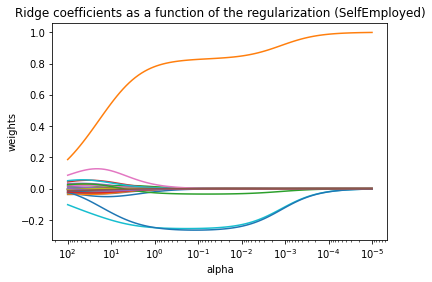

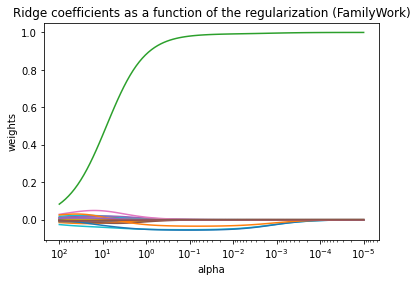

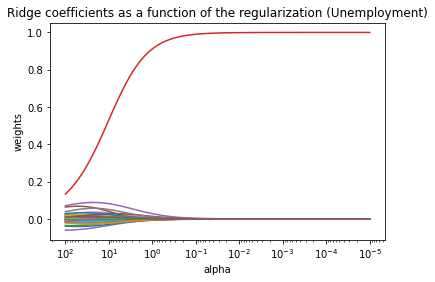

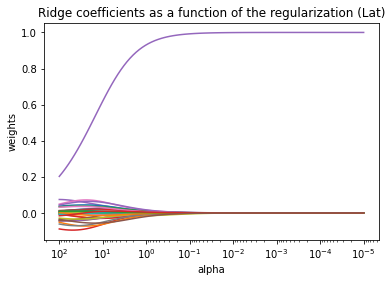

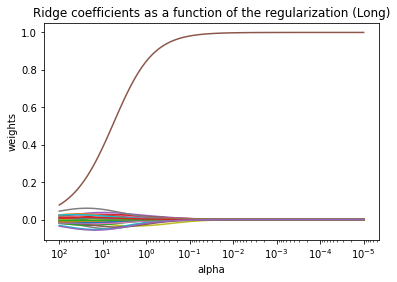

In [ ]:
 for c in range(len(full_normalized_2017_dataset.columns)):
  ax = plt.gca()

  ax.plot(alpha_vals, coefs[c])
  ax.set_xscale("log")
  ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
  plt.xlabel("alpha")
  plt.ylabel("weights")
  plt.title(f"Ridge coefficients as a function of the regularization ({full_normalized_2017_dataset.columns[c]})")
  plt.axis("tight")
  plt.show()